In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Enter label for image 1 (e.g., Early Blight, Leaf Mold, Healthy): Septoria leaf spot
Enter label for image 2 (e.g., Early Blight, Leaf Mold, Healthy): Bacterial spot
Enter label for image 3 (e.g., Early Blight, Leaf Mold, Healthy): Healthy


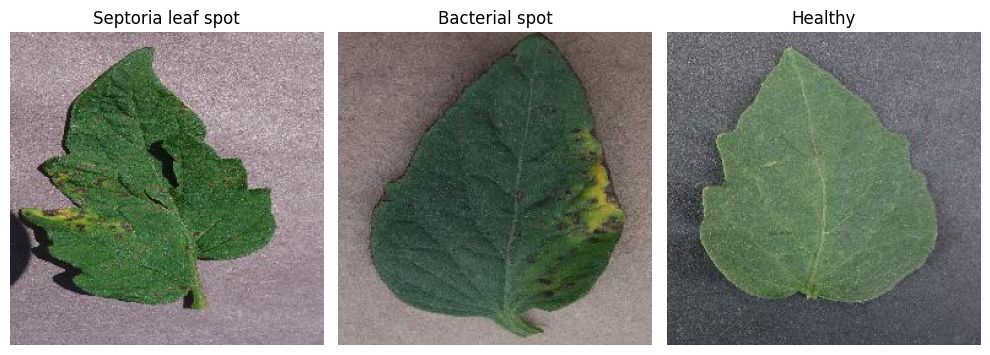

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image paths
image_paths = [
    "/content/drive/MyDrive/archive/tomato/train/Tomato___Septoria_leaf_spot/0286577f-36c8-4b0d-bbf5-404993cd089d___Matt.S_CG 1422.JPG",
    "/content/drive/MyDrive/archive/tomato/train/Tomato___Bacterial_spot/01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG",
    "/content/drive/MyDrive/archive/tomato/train/Tomato___healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG"
]

# Ask user for image labels
image_labels = []
for i, path in enumerate(image_paths):
    label = input(f"Enter label for image {i+1} (e.g., Early Blight, Leaf Mold, Healthy): ")
    image_labels.append(label)

# Rescale only (normalize pixel values between 0 and 1)
datagen = ImageDataGenerator(rescale=1./255)

# Display rescaled images with user-defined labels
plt.figure(figsize=(10, 4))

for i, (img_path, label) in enumerate(zip(image_paths, image_labels)):
    # Load and process image
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array_exp = np.expand_dims(img_array, axis=0)
    rescaled_img = next(datagen.flow(img_array_exp, batch_size=1))[0]

    # Display image with custom label
    plt.subplot(1, 3, i+1)
    plt.imshow(rescaled_img)
    plt.title(label)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Only rescale test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Initialize train_datagen with the desired augmentation settings
# or simply rescaling if no augmentation is needed
train_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/tomato/train',
    target_size=(224, 224),  # Change from 256x256 to 224x224
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/tomato/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # important!
)

Found 6000 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [ ]:
vgg16=VGG16(include_top=False,weights="imagenet",input_shape=[224,224,3])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in vgg16.layers:
  layer.trainable=False

In [ ]:
folder = glob("/content/drive/MyDrive/archive/tomato/train/*")  # Add '/*' to get subdirectories
print(folder)  # Check the list of subdirectories
print(len(folder))

['/content/drive/MyDrive/archive/tomato/train/Tomato___Bacterial_spot', '/content/drive/MyDrive/archive/tomato/train/Tomato___Early_blight', '/content/drive/MyDrive/archive/tomato/train/Tomato___Late_blight', '/content/drive/MyDrive/archive/tomato/train/Tomato___Leaf_Mold', '/content/drive/MyDrive/archive/tomato/train/Tomato___Septoria_leaf_spot', '/content/drive/MyDrive/archive/tomato/train/Tomato___healthy']
6


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Flatten the VGG16 output
x = Flatten()(vgg16.output)

# First Dense Layer
x = Dense(512, activation="relu")(x)  # Added Dense layer with 512 units and ReLU activation

# Second Dense Layer
#x = Dense(256, activation="relu")(x)  # Added another Dense layer with 256 units and ReLU activation

# Output Layer (softmax activation for multi-class classification)
pred_vgg16 = Dense(units=len(folder), activation="softmax")(x)

# Final Model
vgg16_model = Model(inputs=vgg16.input, outputs=pred_vgg16)

In [ ]:
vgg16_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])


In [ ]:
vgg16_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,563,334 (105.15 MB)

 Trainable params: 12,848,646 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the model with class weights
history = vgg16_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=2,
    verbose=1,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
188/188 ━━━━━━━━━━━━━━━━━━━━ 1959s 10s/step - accuracy: 0.6083 - loss: 2.1687 - val_accuracy: 0.7400 - val_loss: 0.7453
Epoch 2/2
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.9183 - loss: 0.2508 - val_accuracy: 0.8400 - val_loss: 0.4337


In [ ]:
# Extract final training and validation accuracy/loss
train_loss = history.history['loss'][-1]
train_acc = history.history['accuracy'][-1] * 100  # Convert to percentage

val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_accuracy'][-1] * 100  # Convert to percentage

# Print results
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_acc:.2f} %")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.2f} %")

Training Loss: 0.2256
Training Accuracy: 92.33 %
Validation Loss: 0.4337
Validation Accuracy: 84.00 %


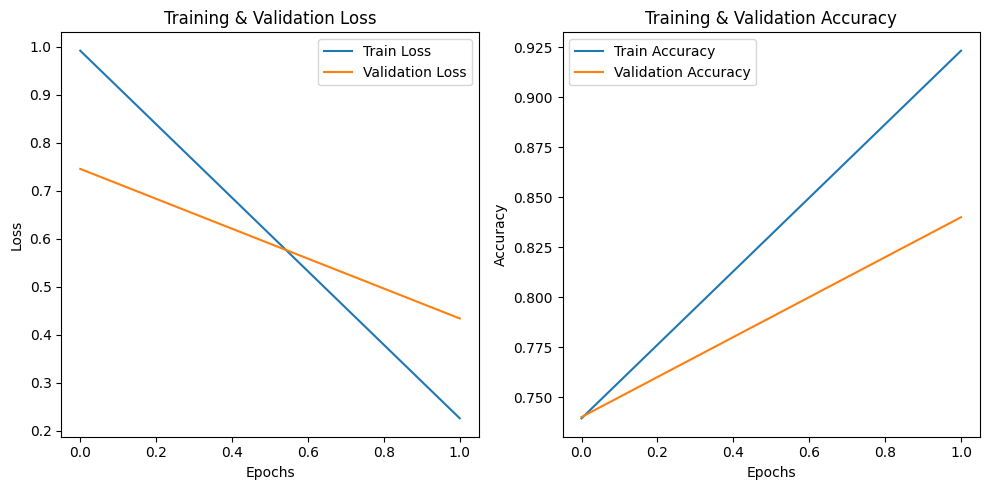

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_steps_per_epoch = int(np.ceil(test_generator.samples / test_generator.batch_size)) # Convert to int using int()
predictions = vgg16_model.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step


In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                             precision    recall  f1-score   support

    Tomato___Bacterial_spot       0.96      0.93      0.94       100
      Tomato___Early_blight       0.71      0.77      0.74       100
       Tomato___Late_blight       0.75      0.77      0.76       100
         Tomato___Leaf_Mold       0.83      0.90      0.86       100
Tomato___Septoria_leaf_spot       0.83      0.80      0.82       100
           Tomato___healthy       1.00      0.87      0.93       100

                   accuracy                           0.84       600
                  macro avg       0.85      0.84      0.84       600
               weighted avg       0.85      0.84      0.84       600



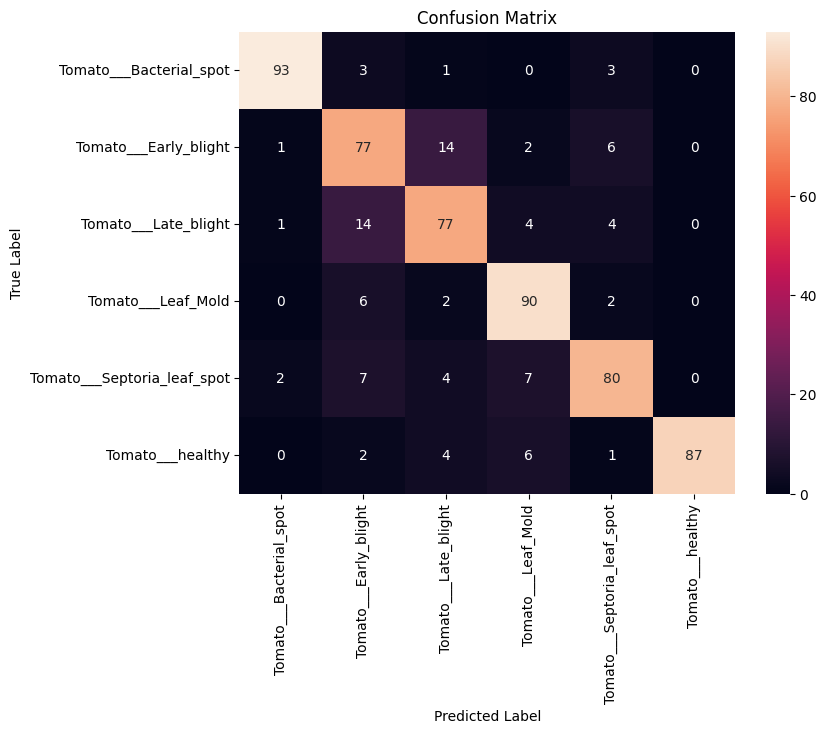

In [ ]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
y_pred_vgg16=vgg16_model.predict(test_generator)

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step


In [ ]:
import numpy as np

# Get the predictions from the model
y_pred_vgg16 = vgg16_model.predict(test_generator)

# Check the shape of y_pred_vgg16
print(y_pred_vgg16.shape)

# If y_pred_vgg16 is 1-dimensional, reshape it
if len(y_pred_vgg16.shape) == 1:
    y_pred_vgg16 = y_pred_vgg16.reshape(-1, 1)  # Reshape to a column vector

# Now apply argmax along axis 1
y_pred_vgg16 = np.argmax(y_pred_vgg16, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step
(600, 6)


In [ ]:
vgg16_model.save("Tomato_vgg16.h5")
from tensorflow.keras.models import load_model
modelvgg16=load_model("Tomato_vgg16.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


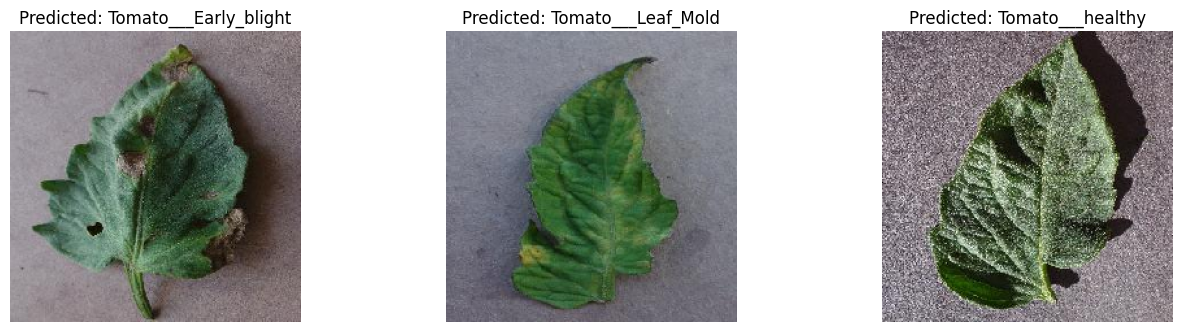

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("Tomato_vgg16.h5")

# Define class labels
class_labels = list(test_generator.class_indices.keys())


# List of 3 image paths to test (Replace with actual paths)
image_paths = [
    "/content/drive/MyDrive/archive/tomato/train/Tomato___Early_blight/0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437.JPG",
    "/content/drive/MyDrive/archive/tomato/train/Tomato___Leaf_Mold/022a4dfb-84cc-45cb-81c5-a620817e31cb___Crnl_L.Mold 6926.JPG",
    "/content/drive/MyDrive/archive/tomato/train/Tomato___healthy/0326b4b6-0f25-47af-bfd9-d8fec314a4f5___RS_HL 0621.JPG"
]

# Create figure with spacing
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.5)  # Adjust space between images

# Iterate over the 3 test images and predict
for i, img_path in enumerate(image_paths):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims for batch

    # Predict class
    preds = model.predict(img_array)
    predicted_class = np.argmax(preds, axis=1)[0]  # Get highest probability index
    predicted_label = class_labels[predicted_class]  # Map index to class label

    # Display image with prediction
    axes[i].imshow(img)
    axes[i].set_title(f"Predicted: {predicted_label}")
    axes[i].axis("off")

plt.show()
